#**Home Credit Default Risk**

##Group 23

# **TEAM AND PROJECT META INFORMATION**




**Email IDs:**

Raj Chavan : rchavan@iu.edu

Sanket Bailmare: sbailmar@iu.edu

Shefali Luley: sluley@iu.edu

Tanay Kulkarni : tankulk@iu.edu


**Group : 23**

**Members: Raj Chavan Sanket Bailmare Shefali Luley Tanay Kulkarni**

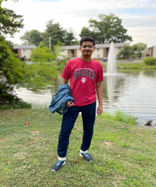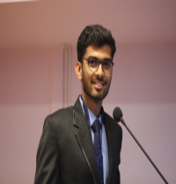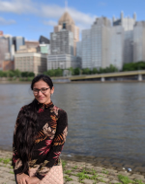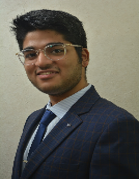

# **PROJECT ABSTRACT**

*In today’s world, many people struggle to get loans due to insufficient credit histories or even non-existing credit records, which often tend to untrustworthy lenders who take advantage of the population. Home Credit acts towards expanding the financial inclusion for the unbanked by providing a secure borrowing experience. Home credit utilizes several alternative data and methods such as clients' background facts, their transactional information to predict their repayment abilities. To ensure that this underserved demographic has a favorable loan experience, we will be using machine learning and statistical methods to determine these predictions. With the help of this, Home credit will ensure that the clients who are capable of repayment will be granted a loan and are not rejected by any means. Also, they will be given a loan maturity plan and a repayment calendar that will accredit our clients to be more successful. In the previous stage, we understood the problem and data, after which we devised our plan of action. Our goal in this phase is to work on the Home Credit Default Risk (HCDR) data and perform some cleaning and preprocessing techniques as well as build the baseline pipeline. We begin with understanding the data, basically to know, what kind of data we are presented with and how many rows and columns in what form are present in the data. We do this by using various functions to get descriptive statistics of each column. After understanding the data, we clean it. This is performed by removing the columns with more than 50% NaN (Null) values. Data cleaning is an important step as it will help us better comprehend what we want to achieve. After cleaning the data, we apply some preprocessing steps which include but are not limited to finding a correlation, dropping columns, finding the mean and median, and also dividing the data into numerical and categorical values. We create a baseline pipeline for the numerical and categorical values and eventually merge them using another pipeline. Finally, we use this data to train our model. We also perform visual EDA to get the results and get more useful insights from the data.*

#**PROJECT DESCRIPTION**

Home Credit is a dataset provided by Home Credit Default risk, a service dedicated to providing lines of credit (loans) to the unbanked population. 
application.csv: This is the main dataset divided into train and test datasets, it also contains information about loan and loan applicants at their application time.
bureau.csv: This file contains information about the loan history of clients from institutes and which were reported to the Credit Bureau. Furthermore, there is one row focused per client's loan in the Credit Bureau.
 bureau_balance.csv: This file contains monthly balances of earlier credits in the Credit Bureau. 
previous_application.csv: This file contains information about the applicant's previous loan in Home credit, also it consists of information about previous loan parameters and the client's information at that particular time.
POS_CASH_balance.csv: This file contains the monthly balance (snapshots) of the previous point of sales (POS) and loans in the form of cash that the applicant had with Home Credit. 
installments_payments.csv: This file contains the previous payment history of clients for each installment for the earlier credits in Home Credit related to the loan in our sample.
credit_card_balance.csv: This file contains the monthly balance (snapshots) of clients' previous credit card history with Home Credit. 


**DataSet Link**: https://www.kaggle.com/c/home-credit-default-risk/data


**The task to be tackled:**
* Summarizing the data: To understand the type of values present in the data and also check for missing values.
* Columns with missing data: We remove the columns with more than 30% of the missing data.
* Rows not present in test dataset: Remove the rows from the training dataset which are not present in the test dataset.
* Segregation of dataset: We segregate the dataset into numerical and categorical variables.
* Building the baseline pipeline: We build a baseline pipeline for categorical and numerical data and then a final pipeline combining both the categorical and numerical data.





**Diagram :**
This is a block diagram to understand the workflow of the data.
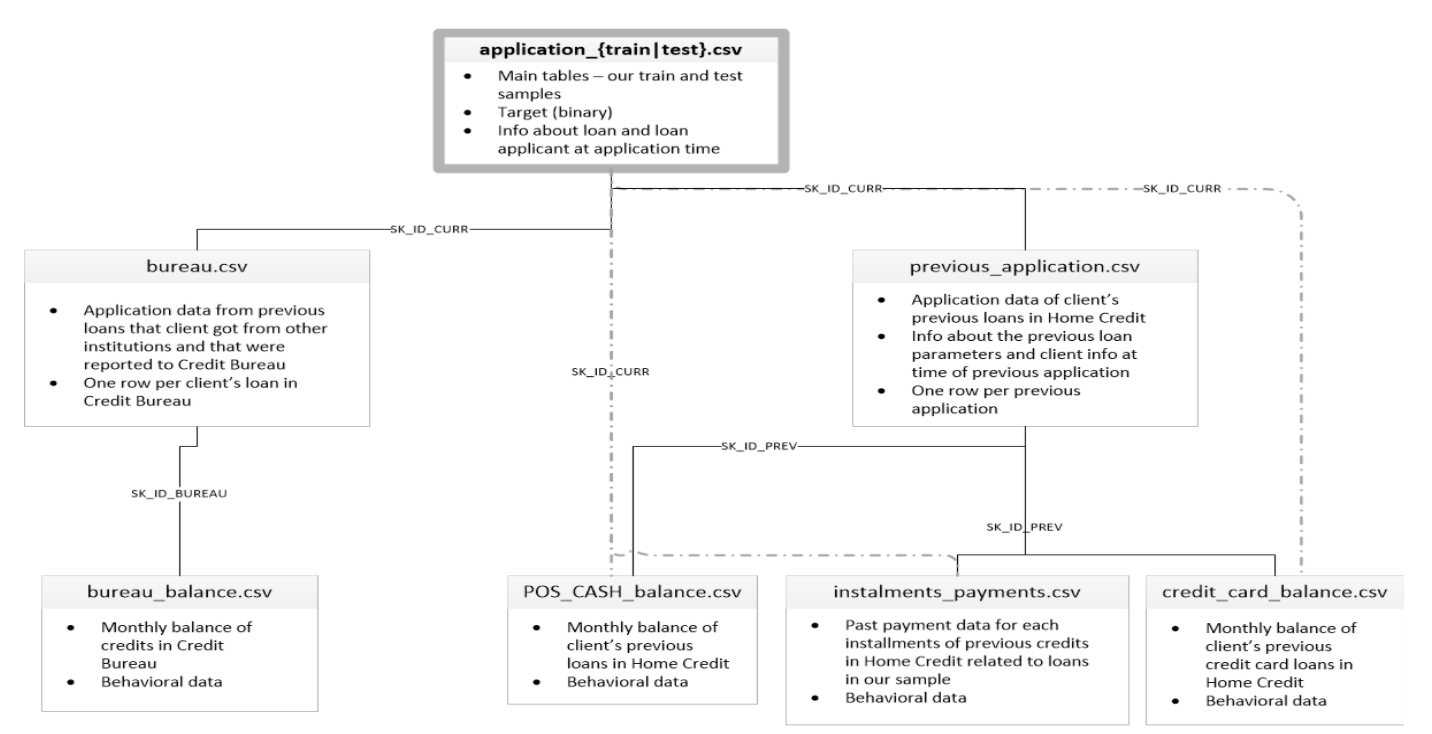

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('drive/MyDrive/application_train.csv')
df_test = pd.read_csv('drive/MyDrive/application_test.csv')


# **EXPLORATORY DATA ANALYSIS + FEATURE ENGINEERING AND TRANSFORMERS**



**Data description:**

df.info() function provides description about the dataset like the number of   columns and rows as well as the types of data present in the dataset. 

df_test.describe() function will give the summary statistics and valuable information like count, mean, minimum, maximum and so on.


**Feature Engineering:**

The first step to deal with the data was to remove the columns which would act as redundant as it would not contribute in prediction.We explored the data and saw the number of missing values. We removed the columns which had more than 50% of missing values. We checked the columns for the number of 0's distribution and removed the columns which has 90% rows with only values as 0's.
Further more we divided the data to identify if it is Numerical and categorical. The numerical data was dealt by creating an intermediate Imputer pipleine where the numerical missing values were replaced with the mean of the the data and the missing values in Categorical missing data was dealt by performing OHE(One hot Encoding) and replacing the missing values with Mode of the columns.

In [ ]:
df.head()

SK_ID_CURR  TARGET  ... AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1  ...                       0.0                        1.0
1      100003       0  ...                       0.0                        0.0
2      100004       0  ...                       0.0                        0.0
3      100006       0  ...                       NaN                        NaN
4      100007       0  ...                       0.0                        0.0

[5 rows x 122 columns]

In [ ]:
df.describe()

SK_ID_CURR  ...  AMT_REQ_CREDIT_BUREAU_YEAR
count  307511.000000  ...               265992.000000
mean   278180.518577  ...                    1.899974
std    102790.175348  ...                    1.869295
min    100002.000000  ...                    0.000000
25%    189145.500000  ...                    0.000000
50%    278202.000000  ...                    1.000000
75%    367142.500000  ...                    3.000000
max    456255.000000  ...                   25.000000

[8 rows x 106 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
df_test.head()

SK_ID_CURR  ... AMT_REQ_CREDIT_BUREAU_YEAR
0      100001  ...                        0.0
1      100005  ...                        3.0
2      100013  ...                        4.0
3      100028  ...                        3.0
4      100038  ...                        NaN

[5 rows x 121 columns]

In [ ]:
df_test.describe()

SK_ID_CURR  ...  AMT_REQ_CREDIT_BUREAU_YEAR
count   48744.000000  ...                42695.000000
mean   277796.676350  ...                    1.983769
std    103169.547296  ...                    1.838873
min    100001.000000  ...                    0.000000
25%    188557.750000  ...                    0.000000
50%    277549.000000  ...                    2.000000
75%    367555.500000  ...                    3.000000
max    456250.000000  ...                   17.000000

[8 rows x 105 columns]

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


 **Declaring some functions**

In [ ]:
def missing_per(df):
    missing_vals = df.isnull().sum(axis=0)*100/len(df)
    return missing_vals.sort_values(ascending=False)


In [ ]:
def remove_cols(df,rem_cols):
  df.drop(columns = rem_cols,inplace=True)
  return df

In [ ]:
# p = missing_per(df)
# cols_to_remove = p.reset_index()
# cols_to_remove.columns = ['col_name','flag']
# cols_to_remove_ = cols_to_remove[cols_to_remove['flag']>50]
# rem_cols = list(cols_to_remove_['col_name'])

In [ ]:
def get_unique_in_a_column(df,n):
  u = []
  for cols in df.columns:
    if cols=='TARGET':
      continue
    u.append([cols,df[cols].nunique()])
  df_temp = pd.DataFrame(u,columns=['col_name','unique_values'])
  return pd.DataFrame(df_temp[df_temp['unique_values']<n])

In [ ]:
def seg_num_cat(df_phase3):
  dfp3_numerical= df_phase3.select_dtypes(exclude='object')
  dfp3_numerical['TARGET'] = df_phase3['TARGET']
  dfp3_categorical= df.select_dtypes(include='object')
  return dfp3_numerical,dfp3_categorical

In [ ]:
# def mean_mode(df_phase3):
#   cols_req_work=[]
#   mean_cols = ['YEARS_BEGINEXPLUATATION_AVG','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BEGINEXPLUATATION_MODE','TOTALAREA_MODE','EXT_SOURCE_3','EXT_SOURCE_2', 'AMT_GOODS_PRICE', 'AMT_ANNUITY','CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE']
#   mode_cols = ['NAME_TYPE_SUITE','DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','CNT_FAM_MEMBERS']
#   print(df_phase3['NAME_TYPE_SUITE'].mode()[0])
#   for i in mean_cols:
#     column_means = df_phase3[i].mean()
#     df_phase3[i] = df_phase3[i].fillna(column_means)
#   for i in mode_cols:
#     col_mode = df_phase3[i].mode()[0]
#     df_phase3[i] = df_phase3[i].fillna(col_mode)
#   return df_phase3



In [ ]:
def zeros_df(df,per):
  dfp3_n0s = pd.DataFrame()
  columns = []
  percentage =[]
  for col in df.columns:
    if col == 'TARGET':
      continue
    count = (df[col] == 0).sum()
    columns.append(col)
    percentage.append(count/len(df[col]))
  dfp3_n0s['Column'] = columns
  dfp3_n0s['Percentage'] = percentage
  per = per/100
  dfp3_n0s = dfp3_n0s[dfp3_n0s['Percentage']>per]

  return dfp3_n0s
 

In [ ]:
def to_consider_as_cat(df,thres_val):
  return list(get_unique_in_a_column(df,thres_val)['col_name'])

In [ ]:
def corr_target(df,cor):
  cor_matrix = df.corr()['TARGET'].sort_values(key=abs,ascending=False).reset_index()
  cor_matrix.columns = ['col_name','Correlation']
  column_after_corr_filter = cor_matrix[abs(cor_matrix['Correlation'])>cor]
  return column_after_corr_filter

In [ ]:
def missing(df,n):
  new_df = missing_per(df).reset_index()
  categ_ = []
  new_df.columns = ['index','flag']
  fin_df = []
  for row in new_df.itertuples():
    try:
      fin_df.append([row.index,row.flag,df[row.index].median(),df[row.index].mean(), df[row.index].nunique()])
    except:
      fin_df.append([row.index,row.flag,df[row.index].mode(),'NA',df[row.index].nunique()])
  cols = ['col_name','percentage_missing','median/Mode','mean','no_of_unique_values']
  temp = pd.DataFrame(fin_df,columns=cols)   
  return  temp[temp['percentage_missing']>n]



**Columns with more than 90% zero values in them**

In [ ]:
more_than_90_zero = zeros_df(df,90)
more_than_90_zero

Column  Percentage
26                    FLAG_EMAIL    0.943280
33    REG_REGION_NOT_LIVE_REGION    0.984856
34    REG_REGION_NOT_WORK_REGION    0.949231
35   LIVE_REGION_NOT_WORK_REGION    0.959341
36        REG_CITY_NOT_LIVE_CITY    0.921827
93      DEF_60_CNT_SOCIAL_CIRCLE    0.912881
95               FLAG_DOCUMENT_2    0.999958
97               FLAG_DOCUMENT_4    0.999919
98               FLAG_DOCUMENT_5    0.984885
99               FLAG_DOCUMENT_6    0.911945
100              FLAG_DOCUMENT_7    0.999808
101              FLAG_DOCUMENT_8    0.918624
102              FLAG_DOCUMENT_9    0.996104
103             FLAG_DOCUMENT_10    0.999977
104             FLAG_DOCUMENT_11    0.996088
105             FLAG_DOCUMENT_12    0.999993
106             FLAG_DOCUMENT_13    0.996475
107             FLAG_DOCUMENT_14    0.997064
108             FLAG_DOCUMENT_15    0.998790
109             FLAG_DOCUMENT_16    0.990072
110             FLAG_DOCUMENT_17    0.999733
111             FLAG_DOCUMENT_18    0.991870
112             FLAG_DOCUMENT_19    0.999405
113             FLAG_DOCUMENT_20    0.999493
114             FLAG_DOCUMENT_21    0.999665

**Dropping the above columns from the dataset**

In [ ]:
df.drop(columns = more_than_90_zero['Column'],inplace = True)

**Columns in training set having more than 30% of missing data, along with their median/mode and unique values in the column**

In [ ]:
missing(df,30)

col_name  ...  no_of_unique_values
0                COMMONAREA_MEDI  ...                 3202
1                COMMONAREA_MODE  ...                 3128
2                 COMMONAREA_AVG  ...                 3181
3       NONLIVINGAPARTMENTS_MEDI  ...                  214
4        NONLIVINGAPARTMENTS_AVG  ...                  386
5       NONLIVINGAPARTMENTS_MODE  ...                  167
6             FONDKAPREMONT_MODE  ...                    4
7           LIVINGAPARTMENTS_AVG  ...                 1868
8          LIVINGAPARTMENTS_MEDI  ...                 1097
9          LIVINGAPARTMENTS_MODE  ...                  736
10                 FLOORSMIN_AVG  ...                  305
11                FLOORSMIN_MEDI  ...                   47
12                FLOORSMIN_MODE  ...                   25
13              YEARS_BUILD_MEDI  ...                  151
14               YEARS_BUILD_AVG  ...                  149
15              YEARS_BUILD_MODE  ...                  154
16                   OWN_CAR_AGE  ...                   62
17                 LANDAREA_MODE  ...                 3563
18                 LANDAREA_MEDI  ...                 3560
19                  LANDAREA_AVG  ...                 3527
20              BASEMENTAREA_AVG  ...                 3780
21             BASEMENTAREA_MEDI  ...                 3772
22             BASEMENTAREA_MODE  ...                 3841
23                  EXT_SOURCE_1  ...               114584
24            NONLIVINGAREA_MODE  ...                 3327
25            NONLIVINGAREA_MEDI  ...                 3323
26             NONLIVINGAREA_AVG  ...                 3290
27                 ELEVATORS_AVG  ...                  257
28                ELEVATORS_MEDI  ...                   46
29                ELEVATORS_MODE  ...                   26
30            WALLSMATERIAL_MODE  ...                    7
31               APARTMENTS_MODE  ...                  760
32                APARTMENTS_AVG  ...                 2339
33               APARTMENTS_MEDI  ...                 1148
34                ENTRANCES_MODE  ...                   30
35                 ENTRANCES_AVG  ...                  285
36                ENTRANCES_MEDI  ...                   46
37               LIVINGAREA_MODE  ...                 5301
38                LIVINGAREA_AVG  ...                 5199
39               LIVINGAREA_MEDI  ...                 5281
40                HOUSETYPE_MODE  ...                    3
41                 FLOORSMAX_AVG  ...                  403
42                FLOORSMAX_MODE  ...                   25
43                FLOORSMAX_MEDI  ...                   49
44  YEARS_BEGINEXPLUATATION_MODE  ...                  221
45  YEARS_BEGINEXPLUATATION_MEDI  ...                  245
46   YEARS_BEGINEXPLUATATION_AVG  ...                  285
47                TOTALAREA_MODE  ...                 5116
48           EMERGENCYSTATE_MODE  ...                    2
49               OCCUPATION_TYPE  ...                   18

[50 rows x 5 columns]

**Segregating the Dataset in numerical and categorical dataframes**

In [ ]:
df_num, df_cat = seg_num_cat(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_num.describe().T

count           mean  ...       75%          max
SK_ID_CURR                  307511.0  278180.518577  ...  367142.5     456255.0
TARGET                      307511.0       0.080729  ...       0.0          1.0
CNT_CHILDREN                307511.0       0.417052  ...       1.0         19.0
AMT_INCOME_TOTAL            307511.0  168797.919297  ...  202500.0  117000000.0
AMT_CREDIT                  307511.0  599025.999706  ...  808650.0    4050000.0
...                              ...            ...  ...       ...          ...
AMT_REQ_CREDIT_BUREAU_DAY   265992.0       0.007000  ...       0.0          9.0
AMT_REQ_CREDIT_BUREAU_WEEK  265992.0       0.034362  ...       0.0          8.0
AMT_REQ_CREDIT_BUREAU_MON   265992.0       0.267395  ...       0.0         27.0
AMT_REQ_CREDIT_BUREAU_QRT   265992.0       0.265474  ...       0.0        261.0
AMT_REQ_CREDIT_BUREAU_YEAR  265992.0       1.899974  ...       3.0         25.0

[81 rows x 8 columns]

In [ ]:
df_cat.describe().T

count  ...    freq
NAME_CONTRACT_TYPE          307511  ...  278232
CODE_GENDER                 307511  ...  202448
FLAG_OWN_CAR                307511  ...  202924
FLAG_OWN_REALTY             307511  ...  213312
NAME_TYPE_SUITE             306219  ...  248526
NAME_INCOME_TYPE            307511  ...  158774
NAME_EDUCATION_TYPE         307511  ...  218391
NAME_FAMILY_STATUS          307511  ...  196432
NAME_HOUSING_TYPE           307511  ...  272868
OCCUPATION_TYPE             211120  ...   55186
WEEKDAY_APPR_PROCESS_START  307511  ...   53901
ORGANIZATION_TYPE           307511  ...   67992
FONDKAPREMONT_MODE           97216  ...   73830
HOUSETYPE_MODE              153214  ...  150503
WALLSMATERIAL_MODE          151170  ...   66040
EMERGENCYSTATE_MODE         161756  ...  159428

[16 rows x 4 columns]

**Numerical Columns and their correlation with the TARGET column in descending order**

In [ ]:
corr_target(df_num,0.00)

col_name  Correlation
0                       TARGET     1.000000
1                 EXT_SOURCE_3    -0.178919
2                 EXT_SOURCE_2    -0.160472
3                 EXT_SOURCE_1    -0.155317
4                   DAYS_BIRTH     0.078239
..                         ...          ...
76    NONLIVINGAPARTMENTS_MODE    -0.001557
77  AMT_REQ_CREDIT_BUREAU_HOUR     0.000930
78  AMT_REQ_CREDIT_BUREAU_WEEK     0.000788
79                  FLAG_MOBIL     0.000534
80            FLAG_CONT_MOBILE     0.000370

[81 rows x 2 columns]

**The Columns named "NAME_FAMILY_STATUS, CODE_GENDER, NAME_INCOME_TYPE"does not have values 'Unknown','XNA' and 'Maternity Leave' in the test dataset thus these rows are removed from the training dataset and there are a total of 11 rows that are removed.**

In [ ]:
df =df[df['NAME_FAMILY_STATUS']!='Unknown']
df =df[df['CODE_GENDER']!='XNA']
df =df[df['NAME_INCOME_TYPE']!='Maternity leave']

**Considering Columns that have more than 2% correlation with the TARGET variable**

In [ ]:
temp_df = corr_target(df_num,0.02)
temp_df

col_name  Correlation
0                        TARGET     1.000000
1                  EXT_SOURCE_3    -0.178919
2                  EXT_SOURCE_2    -0.160472
3                  EXT_SOURCE_1    -0.155317
4                    DAYS_BIRTH     0.078239
5   REGION_RATING_CLIENT_W_CITY     0.060893
6          REGION_RATING_CLIENT     0.058899
7        DAYS_LAST_PHONE_CHANGE     0.055218
8               DAYS_ID_PUBLISH     0.051457
9        REG_CITY_NOT_WORK_CITY     0.050994
10               FLAG_EMP_PHONE     0.045982
11                DAYS_EMPLOYED    -0.044932
12              FLAG_DOCUMENT_3     0.044346
13                FLOORSMAX_AVG    -0.044003
14               FLOORSMAX_MEDI    -0.043768
15               FLOORSMAX_MODE    -0.043226
16            DAYS_REGISTRATION     0.041975
17              AMT_GOODS_PRICE    -0.039645
18                  OWN_CAR_AGE     0.037612
19   REGION_POPULATION_RELATIVE    -0.037227
20                ELEVATORS_AVG    -0.034199
21               ELEVATORS_MEDI    -0.033863
22                FLOORSMIN_AVG    -0.033614
23               FLOORSMIN_MEDI    -0.033394
24               LIVINGAREA_AVG    -0.032997
25              LIVINGAREA_MEDI    -0.032739
26               FLOORSMIN_MODE    -0.032698
27               TOTALAREA_MODE    -0.032596
28      LIVE_CITY_NOT_WORK_CITY     0.032518
29     DEF_30_CNT_SOCIAL_CIRCLE     0.032248
30               ELEVATORS_MODE    -0.032131
31              LIVINGAREA_MODE    -0.030685
32                   AMT_CREDIT    -0.030369
33               APARTMENTS_AVG    -0.029498
34              APARTMENTS_MEDI    -0.029184
35              FLAG_WORK_PHONE     0.028524
36              APARTMENTS_MODE    -0.027284
37         LIVINGAPARTMENTS_AVG    -0.025031
38        LIVINGAPARTMENTS_MEDI    -0.024621
39      HOUR_APPR_PROCESS_START    -0.024166
40                   FLAG_PHONE    -0.023806
41        LIVINGAPARTMENTS_MODE    -0.023393
42             BASEMENTAREA_AVG    -0.022746
43             YEARS_BUILD_MEDI    -0.022326
44              YEARS_BUILD_AVG    -0.022149
45            BASEMENTAREA_MEDI    -0.022081
46             YEARS_BUILD_MODE    -0.022068

**Out of these columns we first need to deal with missing values of the columns. Thus we get all columns which have missing values**

In [ ]:
temp_df_missing = missing(df[temp_df['col_name']],0)


Here in cols_with_no_missing we keep columns not having missing values

In [ ]:
cols_with_no_missing = list(set(temp_df.col_name).difference(set(temp_df_missing.col_name)))


We set a threshold of 10 for unique values in a column, if it is 10 or less we do not consider them as numerical but discrete and replace the missing values with the mode of the column

In [ ]:
less_than_10 = temp_df_missing[temp_df_missing['no_of_unique_values']<=10]
temp_df_missing = temp_df_missing[temp_df_missing['no_of_unique_values']>10]

In [ ]:
for i in less_than_10.col_name:
  df_num[i] = df_num[i].fillna(df_num[i].mode()[0])

for i in less_than_10.col_name:
  df_test[i] = df_test[i].fillna(df_test[i].mode()[0])

**Finally, we get all the column names for the numerical columns that we will consider in our modeling and also imputation**

In [ ]:
final_cols_in_num = list(less_than_10.col_name) + list(temp_df_missing.col_name) +cols_with_no_missing

**This gives us the final numerical dataframe**

In [ ]:
df_num = df_num[final_cols_in_num]

**Here, we get the missing value of columns for the categorical columns, we see that out of 16 columns we get 6 columns that have missing values**

In [ ]:
df_temp = missing(df_cat,0)
df_temp

col_name  percentage_missing  ... mean no_of_unique_values
0   FONDKAPREMONT_MODE           68.386172  ...   NA                   4
1   WALLSMATERIAL_MODE           50.840783  ...   NA                   7
2       HOUSETYPE_MODE           50.176091  ...   NA                   3
3  EMERGENCYSTATE_MODE           47.398304  ...   NA                   2
4      OCCUPATION_TYPE           31.345545  ...   NA                  18
5      NAME_TYPE_SUITE            0.420148  ...   NA                   7

[6 rows x 5 columns]

**Getting the counts of each category in these columns**

**Here we observe that for columns :**

1)FONDKAPREMONT_MODE there is 68% missing data which makes it not ideal to impute missing values with the mode

2)WALLSMATERIAL_MODE, here the difference between the first and the second most occuring values is not much thus imputation with Mode is ambiguous

3)OCCUPATION_TYPE, this is a column that has 31% missing value and again there can not be one specific value that can be decided to impute the missing data with

Thus we remove these columns from the categorical part of the dataframe

In [ ]:
cat_cols_to_rem = ['FONDKAPREMONT_MODE','WALLSMATERIAL_MODE','OCCUPATION_TYPE']


In [ ]:
df_cat.drop(columns = cat_cols_to_rem,inplace=True)

#**VISUAL EXPLORATORY DATA ANALYSIS**

**Visualizing the categorical columns to understand the data more efficiently**

In [ ]:
def col(cat):
      plt.figure(figsize=(10,10))
      plt.title("Loan Default with respect to "+cat,fontweight='bold' , fontsize =16)
      sns.countplot(x=df[cat],hue='TARGET',data=df, palette = 'Blues')
      plt.xticks(rotation=90)

**How is the distribution of of loan according to gender?**


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Percentage of loan with reference to gender')

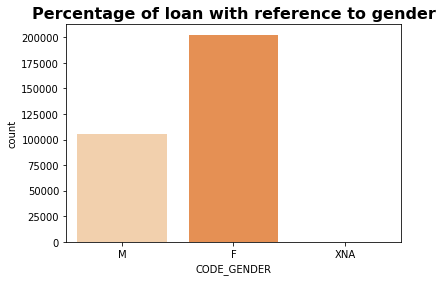

In [ ]:
print(df_cat['CODE_GENDER'].value_counts())
sns.countplot(df_cat['CODE_GENDER'], palette = 'Oranges')
plt.title("Percentage of loan with reference to gender", fontweight = 'bold', fontsize = 16)

**Inference:** The number of female borrowing the loan and who haven't paid is comparatively higher than men. 

**What is the marital status of client?**

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Family Status vs Count')

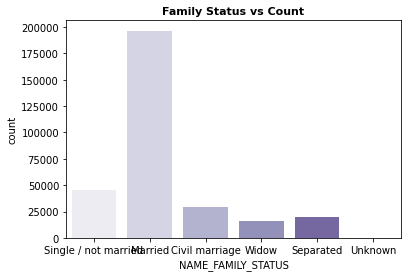

In [ ]:
print(df_cat['NAME_FAMILY_STATUS'].value_counts())
sns.countplot(df_cat['NAME_FAMILY_STATUS'], palette = 'Purples')
plt.title("Family Status vs Count", fontweight = 'bold', fontsize = 11)

**Inference:** The majority of client who are Married have paid the least loan amount while the status of unknown is negligible.

**How many percent of client own a car?**

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Percentage of car owners in the dataset')

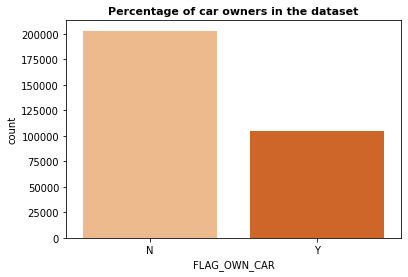

In [ ]:
print(df_cat['FLAG_OWN_CAR'].value_counts())
sns.countplot(df_cat['FLAG_OWN_CAR'], palette = 'Oranges')
plt.title("Percentage of car owners in the dataset", fontweight = 'bold', fontsize = 11)

**Inference:** About 50 % of people own's a car, but there's majority of 
client (more than 50%) who doesn't possess a car and most of them are likely who haven't paid the loan.

**What type of educational background does the clients have?**

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

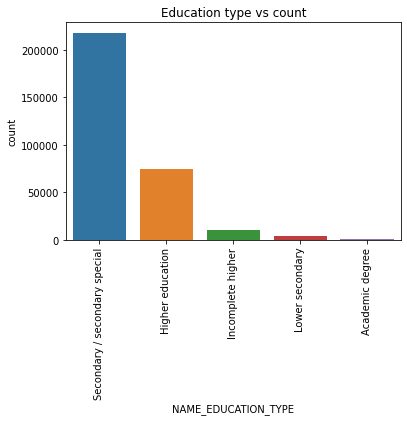

In [ ]:
print(df_cat['NAME_EDUCATION_TYPE'].value_counts())
sns.countplot(df_cat['NAME_EDUCATION_TYPE'])
plt.title("Education type vs count")
plt.xticks(rotation=90)

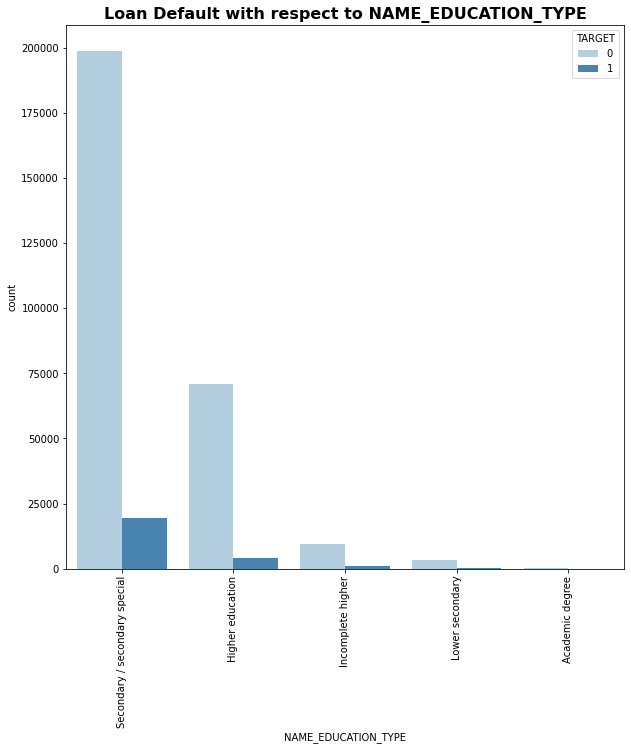

In [ ]:
col('NAME_EDUCATION_TYPE')

**Inference:** Clients with Academic Degree are more likely to repay the loan compared to others.

**What are the types of housing does the clients stay in?**

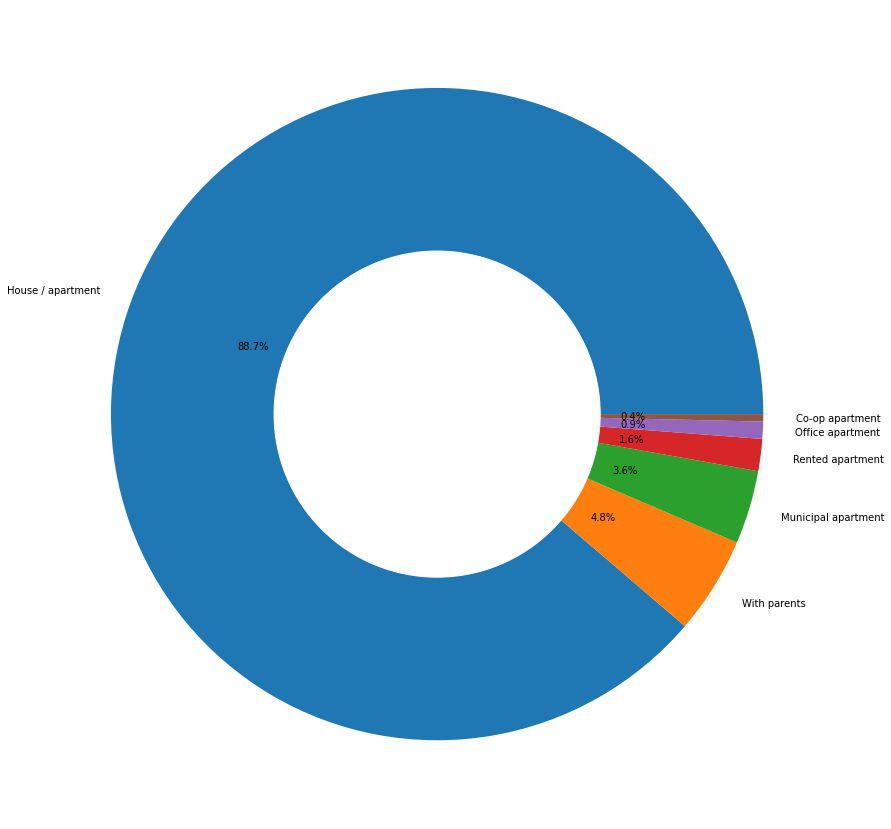

In [ ]:
plt.figure(figsize=[20,15])
plt.pie(df_cat['NAME_HOUSING_TYPE'].value_counts(),labels = df_cat['NAME_HOUSING_TYPE'].value_counts().index,autopct='%1.1f%%')
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
# plt.title('Percentage of User Types')
plt.show()
#plt.ticks(rotation=90)

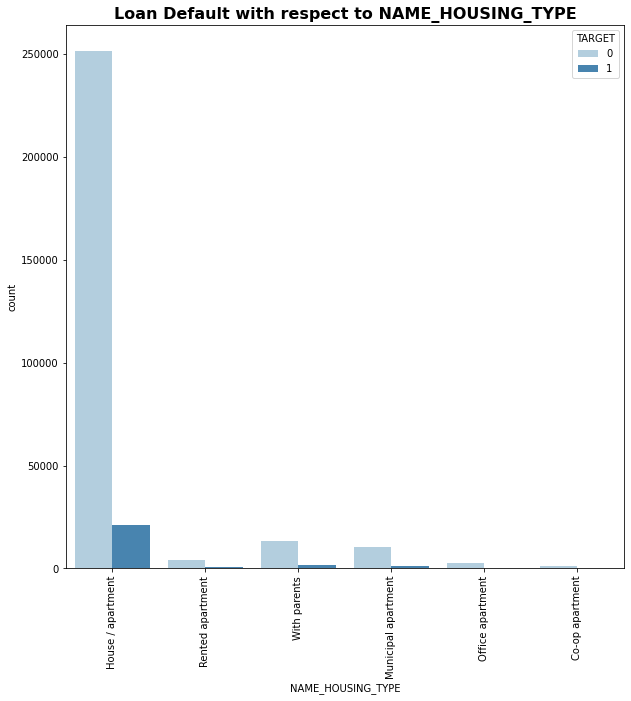

In [ ]:
col("NAME_HOUSING_TYPE")

**Inference:** From the above graphical presentation, we can see that majority of the clients stay in apartment/House haven't paid the loan amount, while the least amount of them stay in office apartment and co-op apartment are negligible.

**What are income type of applicant in terms of loan does the clients have?**

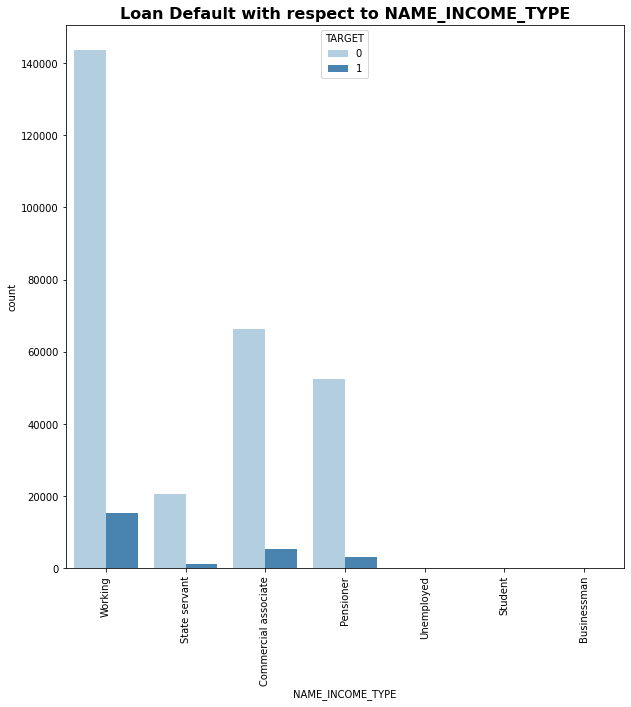

In [ ]:
col("NAME_INCOME_TYPE")

**Inference:**
All the Students and Businessman are neglibile, here we can see that majority of working people are hardly paying the loan.

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of loan approval process vs day ')

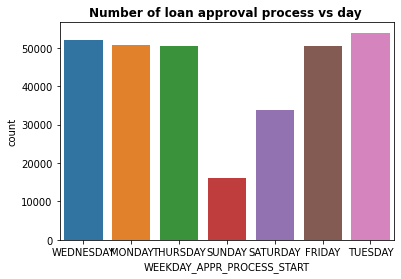

In [ ]:
print(df_cat['WEEKDAY_APPR_PROCESS_START'].value_counts())
sns.countplot(df_cat['WEEKDAY_APPR_PROCESS_START'])
plt.title("Number of loan approval process vs day ", fontweight = 'bold', fontsize = 12)

**Inference:** 
The loan approval process has the highest count starting tuesday ,while the lowest count can be clearly seen on the weekends.

****What type of loan are available?****

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Types of loan available')

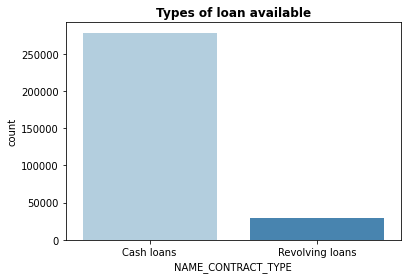

In [ ]:
print(df_cat['NAME_CONTRACT_TYPE'].value_counts())
sns.countplot(df_cat['NAME_CONTRACT_TYPE'], palette = 'Blues')
plt.title("Types of loan available", fontweight = 'bold', fontsize = 12)

**Inference:** 
Many people are willing to take cash loan than revolving loan

**Here, we plot some graphs for the columns with highest correlations with the Target variable and observe the trend with respect to the target variable.**



Text(0.5, 1.0, 'EXT_SOURCE_3 vs TARGET')

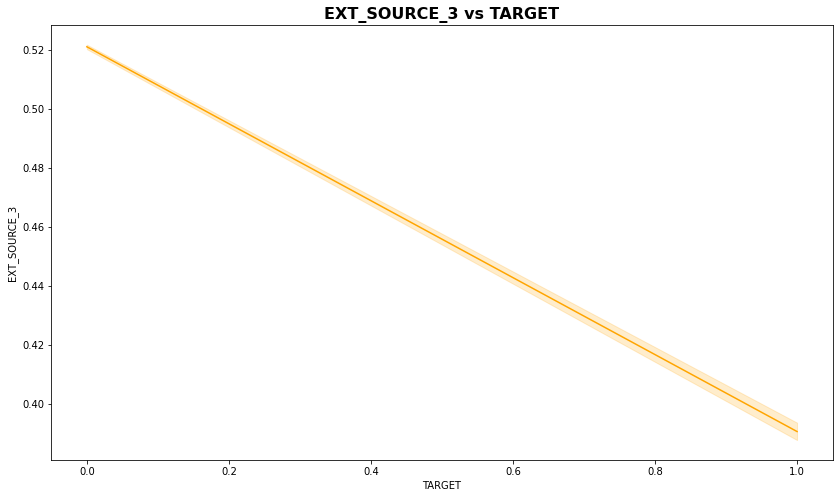

In [ ]:
#Numerical Plot
plt.figure(figsize=[14,8])
sns.lineplot(x='TARGET',y='EXT_SOURCE_3',data=df,color= 'orange')
plt.title("EXT_SOURCE_3 vs TARGET", fontweight = 'bold', fontsize = 16)

Text(0.5, 1.0, 'EXT_SOURCE_2 vs TARGET')

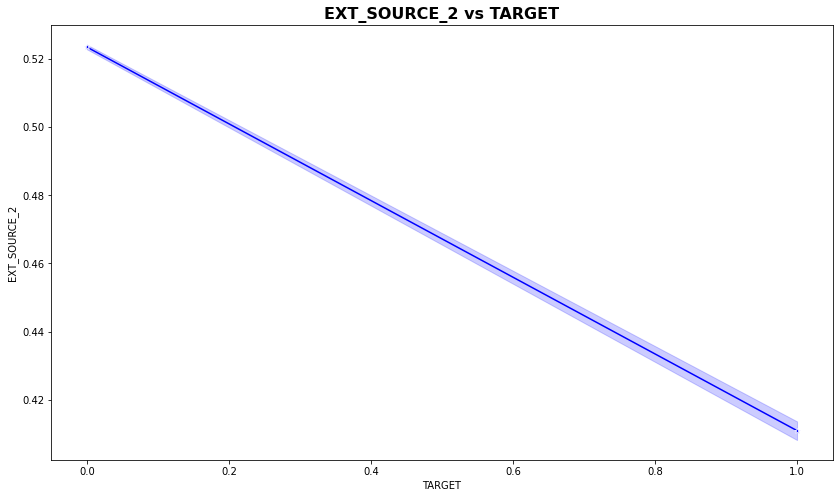

In [ ]:
plt.figure(figsize=[14,8])
sns.lineplot(x='TARGET',y='EXT_SOURCE_2',data=df,marker='*',color= 'blue')
plt.title("EXT_SOURCE_2 vs TARGET", fontweight = 'bold', fontsize = 16)

Text(0.5, 1.0, 'EXT_SOURCE_1 vs TARGET')

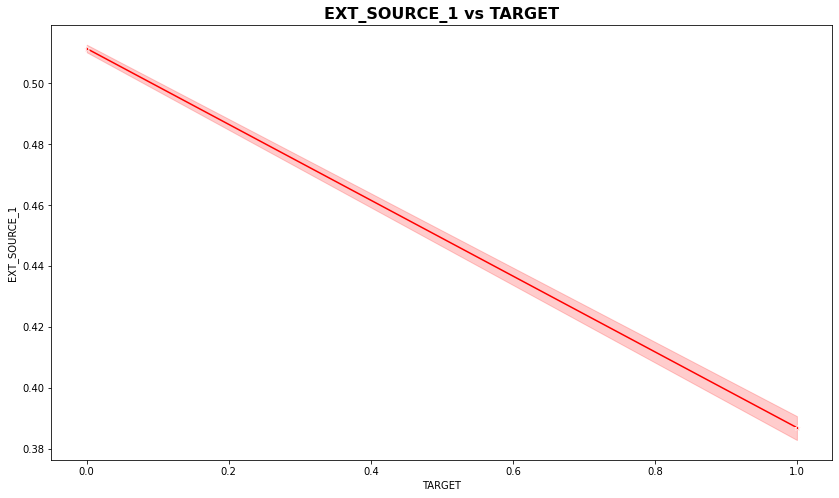

In [ ]:
plt.figure(figsize=[14,8])
sns.lineplot(x='TARGET',y='EXT_SOURCE_1',data=df,marker='*',color= 'red')
plt.title("EXT_SOURCE_1 vs TARGET", fontweight = 'bold', fontsize = 16)

**Inference:**We see these for the columns EXT_SOURCE_3, EXT_SOURCE_2 and EXT_SOURCE_1 and can observe a clear strong negative correlation

**What type of correlation does the columns DAYS_BIRTH and DAY_LAST_PHONE_CHANGE have with respect to target?**







Text(0.5, 1.0, 'DAYS_BIRTH vs TARGET')

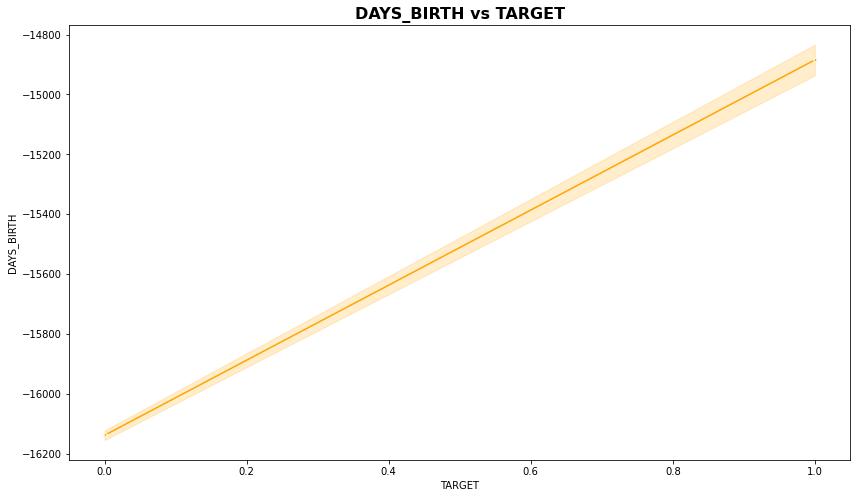

In [ ]:
plt.figure(figsize=[14,8])
sns.lineplot(x='TARGET',y='DAYS_BIRTH',data=df,marker='*',color= 'orange')
plt.title("DAYS_BIRTH vs TARGET", fontweight = 'bold', fontsize = 16)

Text(0.5, 1.0, 'DAYS_LAST_PHONE_CHANGE vs TARGET')

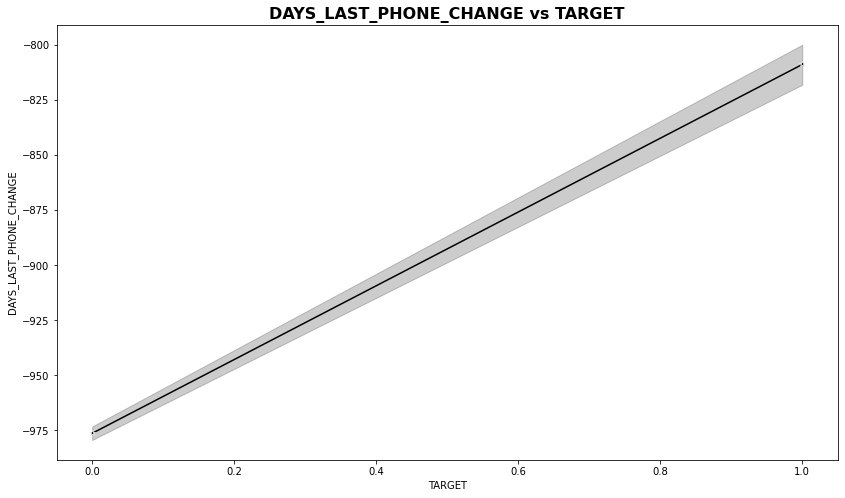

In [ ]:
plt.figure(figsize=[14,8])
sns.lineplot(x='TARGET',y='DAYS_LAST_PHONE_CHANGE',data=df,marker='*',color= 'black')
plt.title("DAYS_LAST_PHONE_CHANGE vs TARGET", fontweight = 'bold', fontsize = 16)

**Inference:** From the above plots,we can see that for columns of DAYS_BIRTH and DAYS_LAST_PHONE_CHANGE we see a strong positive correlation with respect to the target.

# **MODELING PIPELINES**

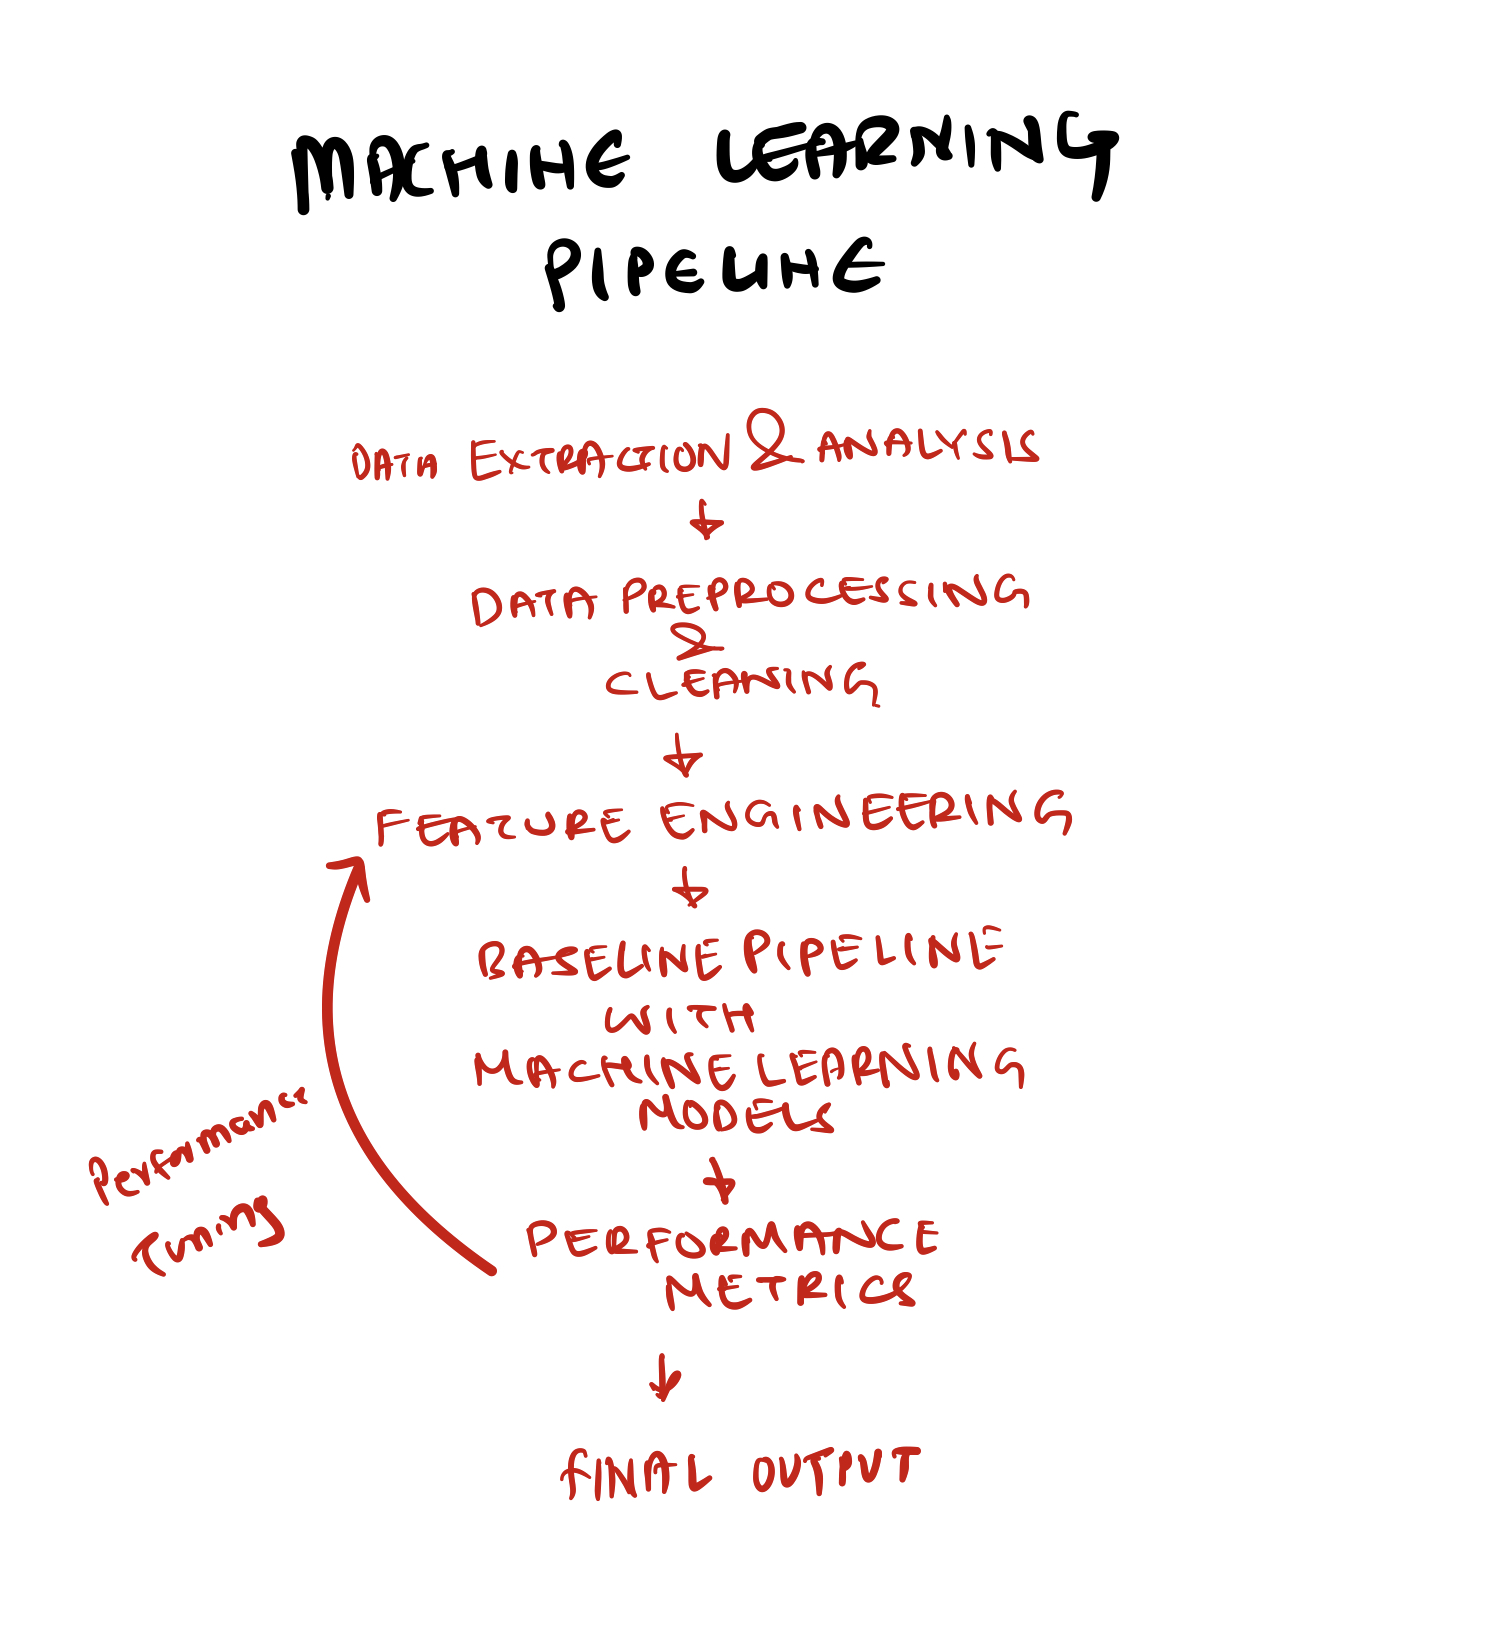

In this project, we are creating three pipelines, one for numerical data, one for categorical data and finally a pipeline to combine the data. 

(i).Numerical data pipeline:
For the pipeline with numerical data also called ‘num_pipeline’, we impute the missing values by the mean of the columns.

(ii). Categorical data pipeline:
For the pipeline with categorical data also called ‘cat_pipeline’, we impute the missing values by the mode or the most frequent data.

(iii)Final pipeline:
We create a pipeline to merge the numerical and categorical columns that have no missing values. The categorical columns are also one hot encoded.



Importing necessary packages

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

**Finally selecting only the columns that we have finally decided for the numerical and the categorical part**

In [ ]:
df_num.drop(columns = ['TARGET'],inplace=True)
df_cols = list(df_num.columns)+ list(df_cat.columns)
df_i = df[df_cols]


**Making two pipelines one for the numerical data where we impute the missing values by the mean of the columns, and the other for categorical data where we impute the missing data in the categorical columns using the Mode or the most frequent data.**

In [ ]:
num_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))])

cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

**Here we create a pipeline to merge the numerical and categorical columns that have no missing values and the categorical columns are one hot encoded.**

In [ ]:
data_pipeline = ColumnTransformer([
    ("num_pipeline", num_pipeline, df_num.columns),
    ("cat_pipeline", cat_pipeline, df_cat.columns)], n_jobs = -1)
df_transformed = data_pipeline.fit_transform(df_i)
column_names = list(df_num.columns)  + \
               list(data_pipeline.transformers_[1][1].named_steps["ohe"].get_feature_names(df_cat.columns))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**This is the final dataset that we get for training our model**

In [ ]:
df_n = pd.DataFrame(df_transformed,  columns=column_names)

#**RESULTS AND DISCUSSION OF RESULTS**

In [ ]:
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
models_results = []

In [ ]:
X = df_n.values
y = df['TARGET'].values

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=42)


Here we will be using the lbfgs solver which is a Limited-memory BFGS (L-BFGS or LM-BFGS) optimization algorithm in the family of quasi-Newton methods that approximates the Broyden–Fletcher–Goldfarb–Shanno algorithm (BFGS) using a limited amount of computer memory

In [ ]:
pipe = Pipeline([
('scaler', StandardScaler()),
('classifier', LogisticRegression(solver='lbfgs', max_iter=1000))
])
 
pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(max_iter=1000))])

In [ ]:

print('Training set accuracy score: ' + str(pipe.score(X_train,y_train)))
y_pred = pipe.predict(X_valid)
print('Validation set accuracy score: ' + str(accuracy_score(y_valid,y_pred)))
print('Log loss: ',log_loss(y_valid,y_pred))
print('Confusion Matrix: ','\n',confusion_matrix(y_valid, y_pred))
print('ROC_AUC: ',roc_auc_score(y_valid, pipe.predict_proba(X_valid)[:, 1]))

Training set accuracy score: 0.9192998565279771
Validation set accuracy score: 0.9185474254742547
Log loss:  2.8132732637903612
Confusion Matrix:  
 [[42322    58]
 [ 3699    46]]
ROC_AUC:  0.7357038265902436


In [ ]:
models_results.append(['Logistic Regression',pipe.score(X_train,y_train),accuracy_score(y_valid,y_pred)])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


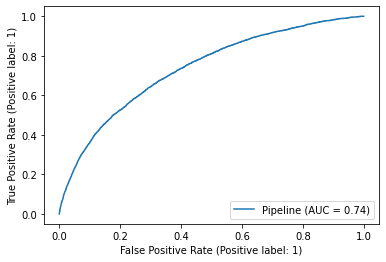

In [ ]:
metrics.plot_roc_curve(pipe, X_valid, y_valid)

In [ ]:
pipe_naive_bayes = Pipeline([
('scaler', StandardScaler()),
('classifier', GaussianNB())
])
 
pipe_naive_bayes.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('classifier', GaussianNB())])

In [ ]:
 
print('Training set accuracy score: ' + str(pipe_naive_bayes.score(X_train,y_train)))
y_pred = pipe_naive_bayes.predict(X_valid)
print('Validation set accuracy score: ' + str(accuracy_score(y_valid,y_pred)))
print('Log loss: ',log_loss(y_valid,y_pred))
print('Confusion Matrix: ','\n',confusion_matrix(y_valid, y_pred))
print('ROC_AUC: ',roc_auc_score(y_valid, pipe_naive_bayes.predict_proba(X_valid)[:, 1]))

Training set accuracy score: 0.174779531324725
Validation set accuracy score: 0.17394037940379403
Log loss:  28.531744445893832
Confusion Matrix:  
 [[ 4543 37837]
 [  265  3480]]
ROC_AUC:  0.6249500419310065


In [ ]:
models_results.append(['Naive Bayes',pipe_naive_bayes.score(X_train,y_train),accuracy_score(y_valid,y_pred)])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


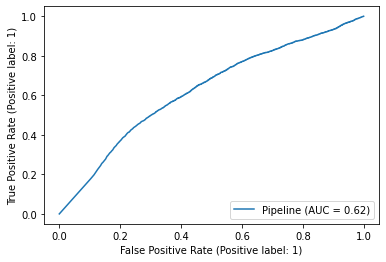

In [ ]:
metrics.plot_roc_curve(pipe_naive_bayes, X_valid, y_valid)

In [ ]:
pipe_rf = Pipeline([
('scaler', StandardScaler()),
('classifier', RandomForestClassifier())
])
 
pipe_rf.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier())])

In [ ]:
 
print('Training set accuracy score: ' + str(pipe_rf.score(X_train,y_train)))
y_pred = pipe_rf.predict(X_valid)
print('Validation set accuracy score: ' + str(accuracy_score(y_valid,y_pred)))
print('Log loss: ',log_loss(y_valid,y_pred))
print('Confusion Matrix: ','\n',confusion_matrix(y_valid, y_pred))
print('ROC_AUC: ',roc_auc_score(y_valid, pipe_rf.predict_proba(X_valid)[:, 1]))

Training set accuracy score: 0.9999808703969393
Validation set accuracy score: 0.9189593495934959
Log loss:  2.799044972630154
Confusion Matrix:  
 [[42376     4]
 [ 3734    11]]
ROC_AUC:  0.7072585942811274


In [ ]:
models_results.append(['Random Forest Classifier',pipe_rf.score(X_train,y_train),accuracy_score(y_valid,y_pred)])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


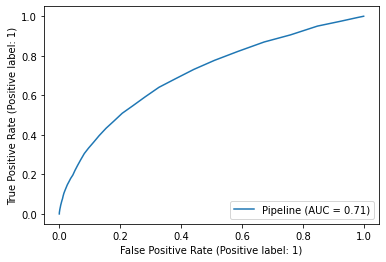

In [ ]:
metrics.plot_roc_curve(pipe_rf, X_valid, y_valid)

In [ ]:
pd.DataFrame(models_results,columns = ['Model Name', 'Training Accuracy', 'Validation Accuracy'])

Model Name  Training Accuracy  Validation Accuracy
0       Logistic Regression           0.919300             0.918547
1               Naive Bayes           0.174780             0.173940
2  Random Forest Classifier           0.999981             0.918959

Here we see that Random Forest Classifier has the best training accuracy of around 99% but an accuracy like this runs a risk of overfitting. The logistic Regression Model also gives an accuracy of 91% which is descent enough and seems to be a consdierable model. The ROC Area Under Curve value for Random Forest Classifier and the Logistic regression models are 0.704 and 0.735 respectively and both of them show a significant amount of True Positive values which shows that this is a good model fit. We cannot consider Naive Bayes as our model as it is evidently underfitting the data. We need to check how Random Forest classifier and the Logistic Regression model works on the test data to confirm if Random forest is really overfitting.

#**For Kaggle submission**

In [ ]:
X = df_n.values
y = df['TARGET'].values

In the following pipeline we use standard scaler to normalize the data with mean being zero and the standard deviation being 1, and use Logistic Regression as our modeling algorithm with solver being lbfgs and interations for convergence being 1000

In [ ]:
pipe = Pipeline([
('scaler', StandardScaler()),
('classifier', LogisticRegression(solver='lbfgs', max_iter=1000))
])
 
pipe.fit(X, y)
 
print('Training set score: ' + str(pipe.score(X,y)))


Training set score: 0.919190243902439


In [ ]:
pipe_rf = Pipeline([
('scaler', StandardScaler()),
('classifier', RandomForestClassifier())
])
 
pipe_rf.fit(X, y)



Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier())])

In [ ]:
print('Training set score: ' + str(pipe_rf.score(X_train,y_train)))

Training set score: 0.9999464371114299


##Test Dataset

Here we get the same final columns as for the training dataset in the test dataset

In [ ]:
df_test_n= df_test[df_cols]

In [ ]:
df_test_n

DEF_30_CNT_SOCIAL_CIRCLE  ...  EMERGENCYSTATE_MODE
0                           0.0  ...                   No
1                           0.0  ...                  NaN
2                           0.0  ...                  NaN
3                           0.0  ...                   No
4                           0.0  ...                  NaN
...                         ...  ...                  ...
48739                       0.0  ...                  NaN
48740                       0.0  ...                  NaN
48741                       0.0  ...                   No
48742                       0.0  ...                   No
48743                       0.0  ...                  NaN

[48744 rows x 59 columns]

In [ ]:
# df_num.drop(columns = ['TARGET'],inplace=True)

In [ ]:

df_transformed = data_pipeline.fit_transform(df_test)
column_names = list(df_num.columns)  + \
               list(data_pipeline.transformers_[1][1].named_steps["ohe"].get_feature_names(df_cat.columns))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_transformed.shape

(48744, 154)

In [ ]:
df_n_test = pd.DataFrame(df_transformed,  columns=column_names)

In [ ]:
X = df_n_test.values

In [ ]:
result = pipe_rf.predict(X)

In [ ]:
result_prob = pipe_rf.predict_proba(X)

In [ ]:
r = pd.DataFrame(result,columns=['result'])

In [ ]:
r[['class_0_prob','class_1_prob']] = result_prob

In [ ]:
final_sub = pd.DataFrame()

In [ ]:
final_sub['SK_ID_CURR'] = df_test['SK_ID_CURR']
final_sub['TARGET'] = r['class_1_prob']

In [ ]:
final_sub = final_sub.set_index('SK_ID_CURR')

In [ ]:
final_sub

TARGET
SK_ID_CURR        
100001        0.08
100005        0.12
100013        0.06
100028        0.01
100038        0.07
...            ...
456221        0.02
456222        0.08
456223        0.02
456224        0.06
456250        0.11

[48744 rows x 1 columns]

In [ ]:
final_sub.to_csv('submission.csv')

##Kaggle Test Accuracy

For Logistic Regression

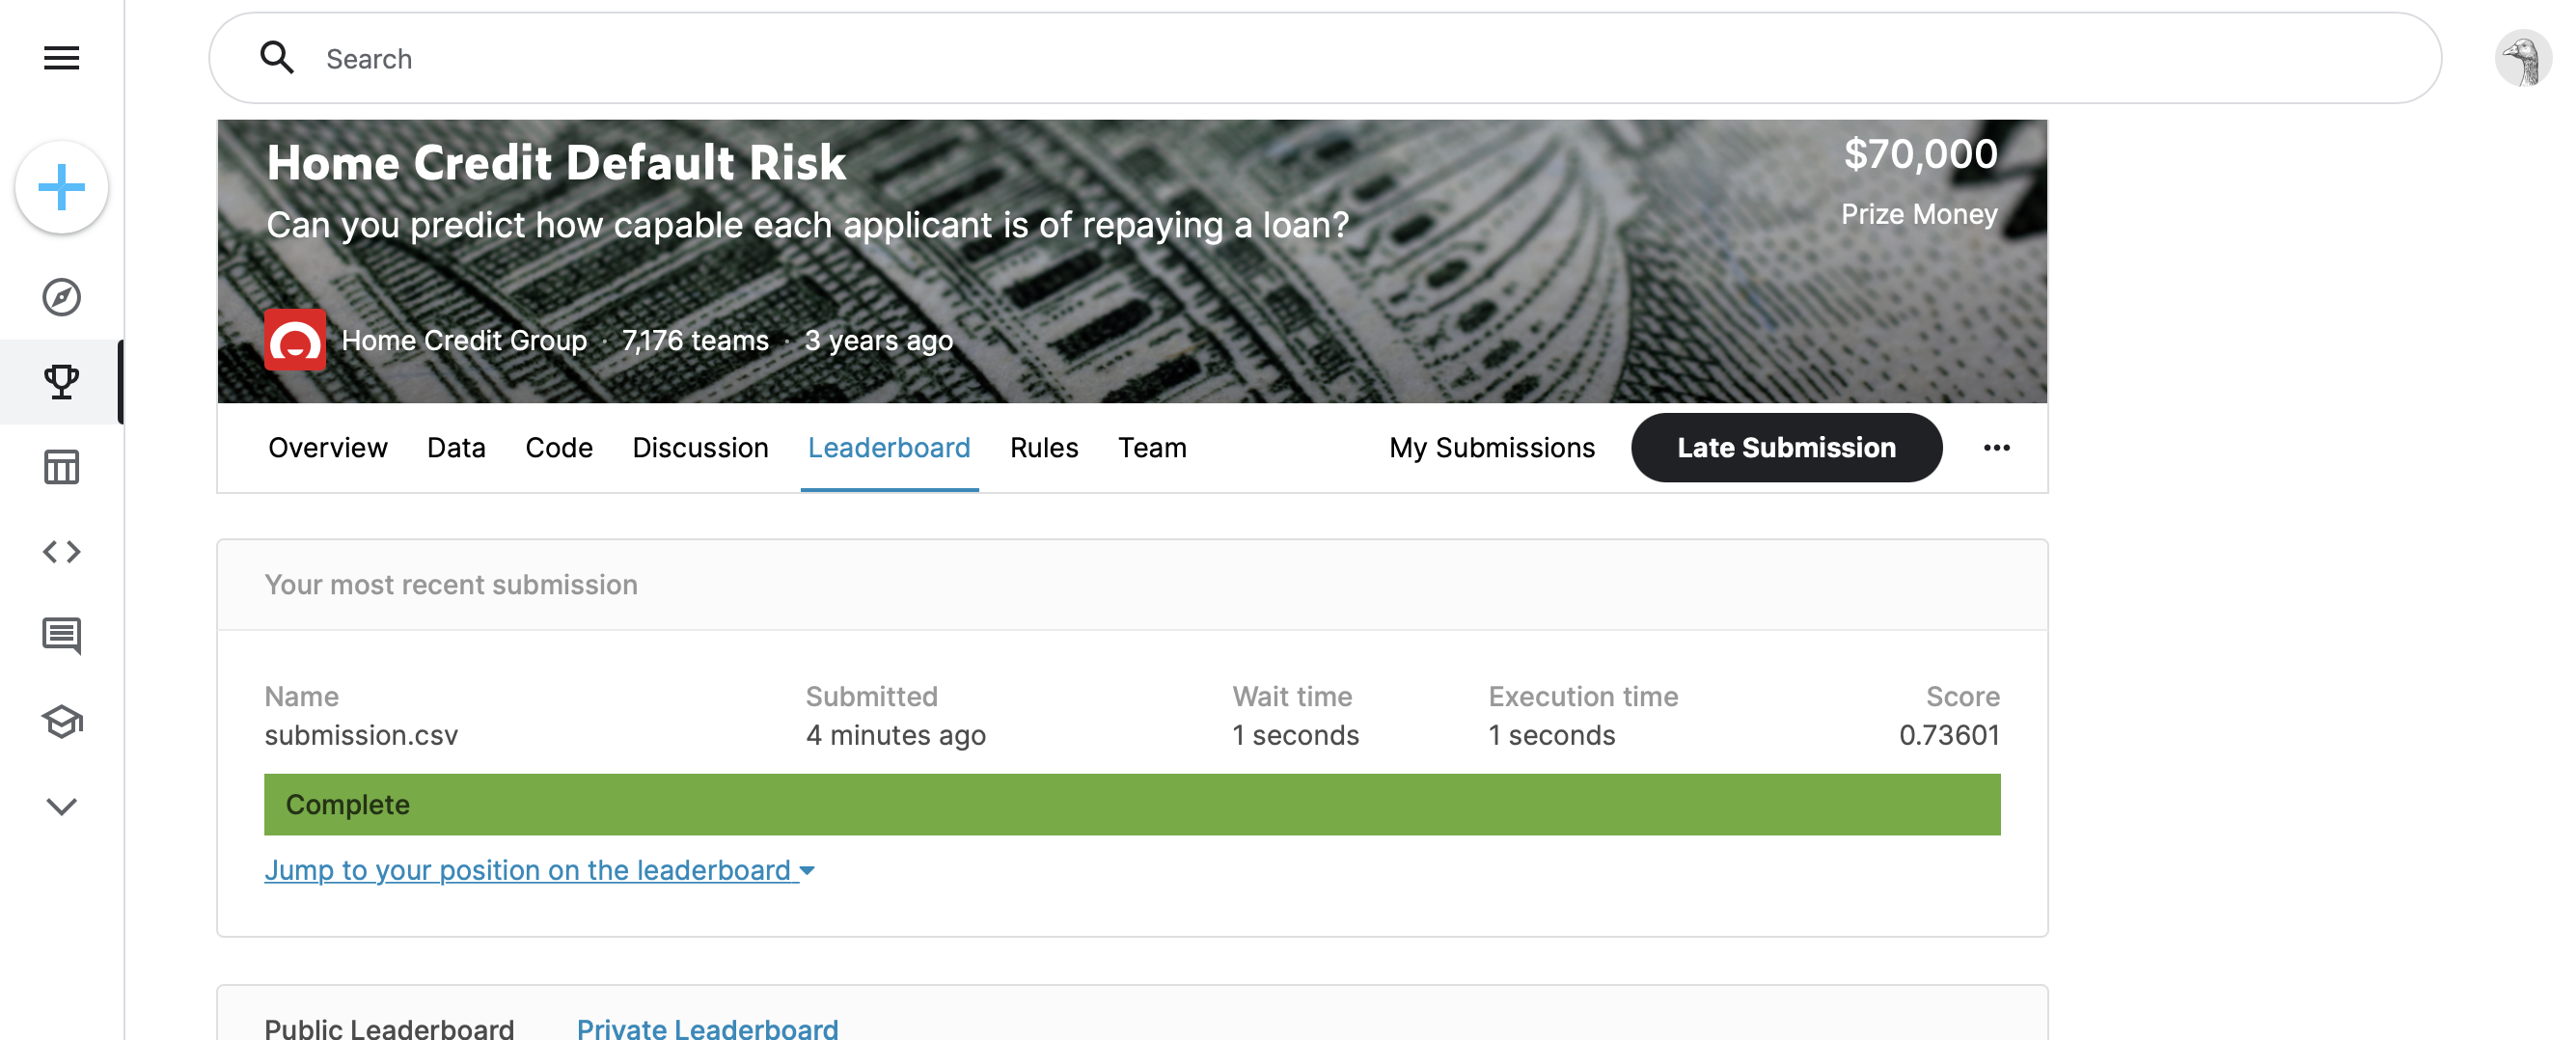

For Random Forest Classifier

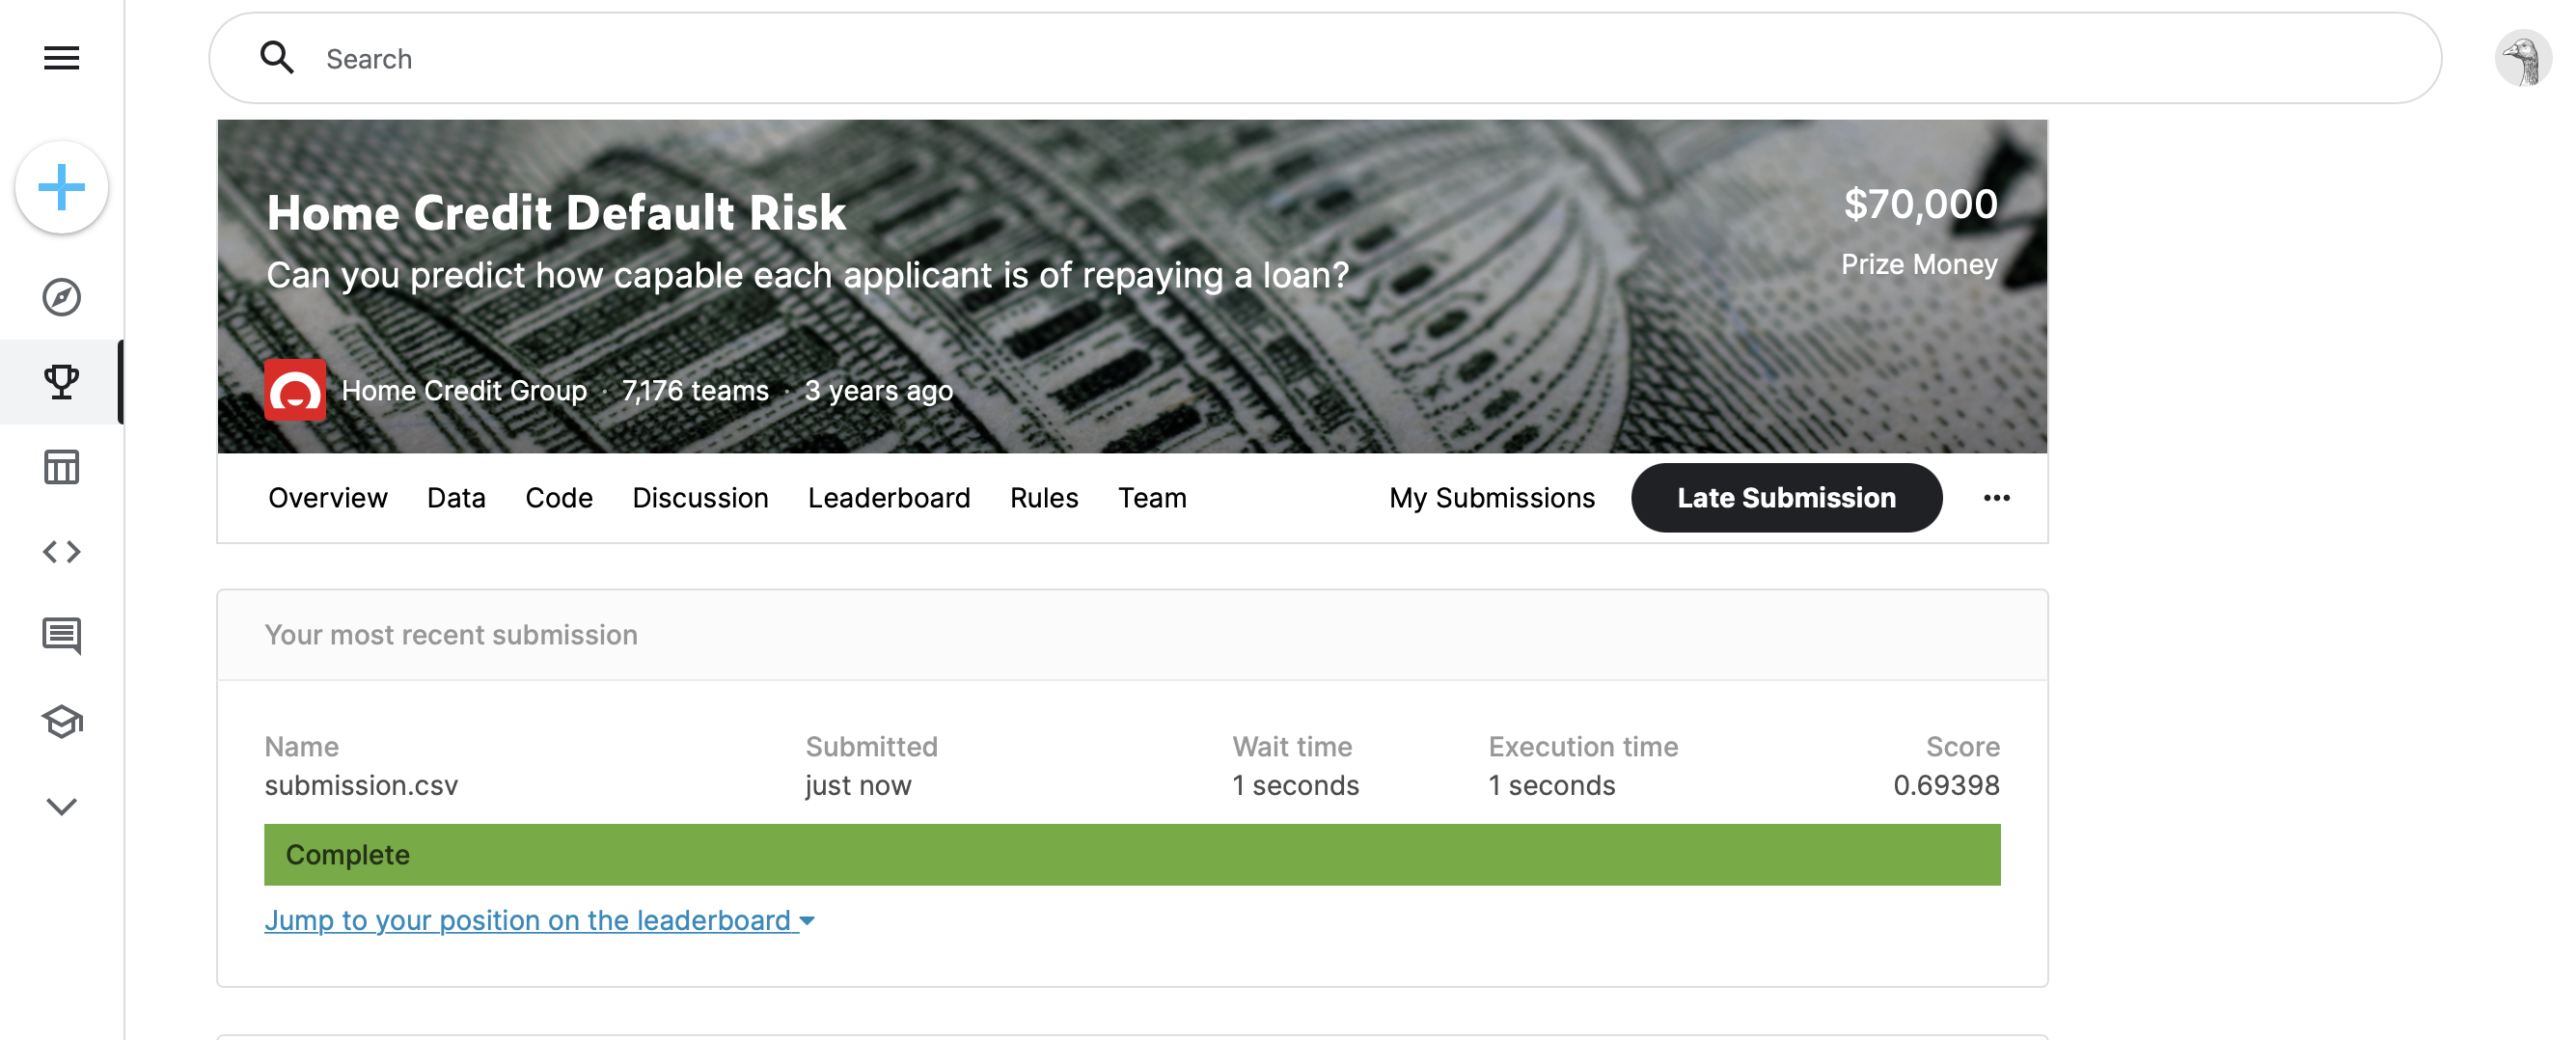

With high training accuracy and a low test accuracy we can see that the Random forest classifier seems to be over fitting and thus the ideal choice of model would be Logistic Regression


# **CONCLUSION**

In this phase, we actually start playing with the dataset. It included understanding the dataset, what information we are presented with and then cleaning the data accordingly. We picked only the features which were important to the target variable and prediction.We featured the data performing OHE and applied imputing methods to fix the data before feeding it to the model. We were able to create the baseline pipeline and could experimentally understand the accuracies of the models like logistic regression, naive bayes and Random forest. Based on the results of the models we saw that there might be underfitting in naive bayes and  overfitting in RandomForest.The best model that we could get for Phase 0 was Logistic Regression which gave a training accuracy of 91.9% and the kaggle submission accuracy of 73.6%. Further we are planning to improvise the feature engineering, perform hyperparameter tuning for our models alongside using K-Fold cross validation and GridSearchCV, we might also use some advanced gradient boosting models so that we could get as close to the best accuracy as we can. After the aforementioned step we also plan to apply Deep Learning techniques like developing Artificial Neural Networks for better prediction results.


References:https://www.kaggle.com/c/home-credit-default-risk/data
